# A simple classification task

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
fruits=pd.read_table('fruit_data_with_colors.txt')

In [5]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [10]:
lookup_fruits_name=dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
lookup_fruits_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

<IPython.core.display.Javascript object>


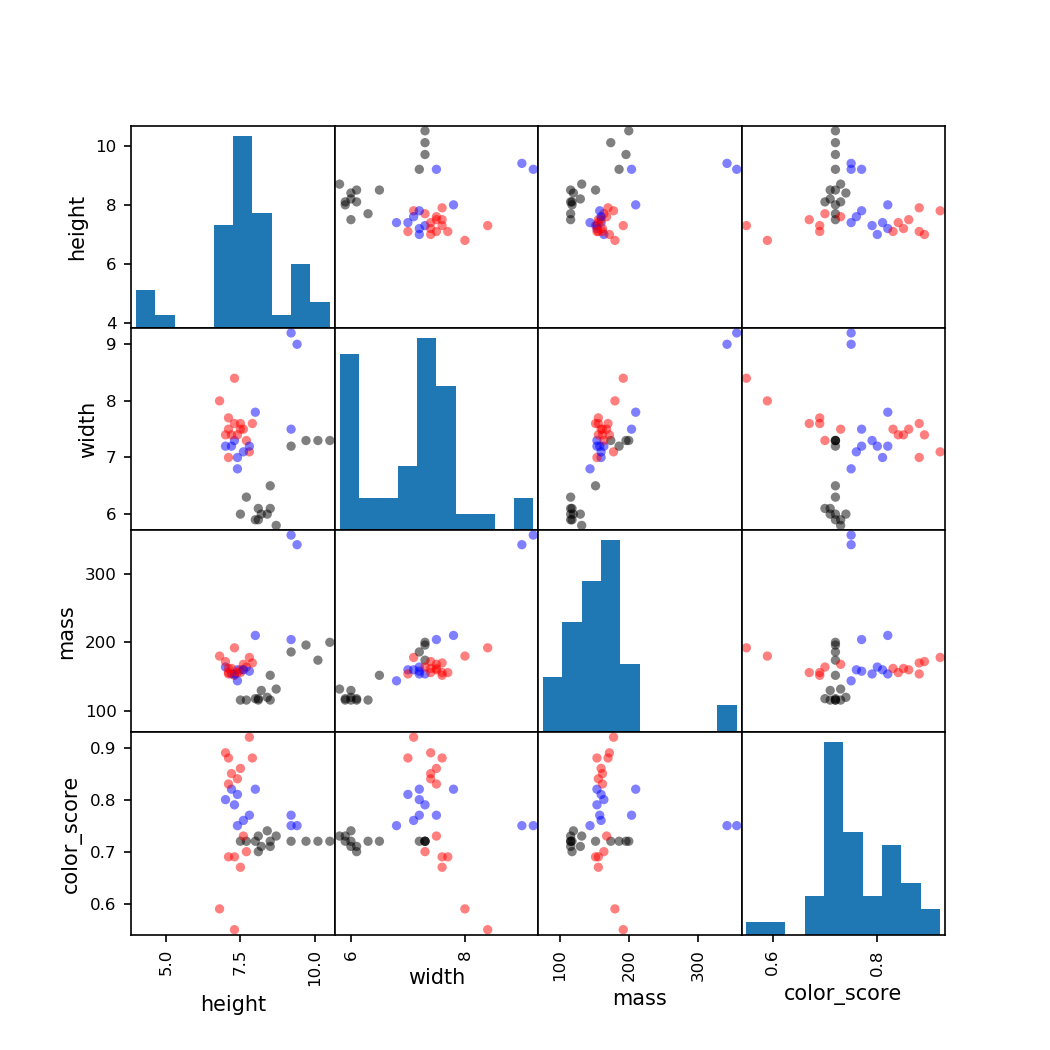

In [26]:
from matplotlib import cm
X=fruits[['height','width','mass','color_score']]
y=fruits['fruit_label']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
#X_train.shape
cmap=cm.get_cmap('flag')
#scatter=pd.scatter_matrix(X_train,c=y_train,marker='o',s=20,figsize=(9,9),cmap=cmap)
scatter=pd.plotting.scatter_matrix(X_train,c=y_train,marker='o',s=20,figsize=(7,7),cmap=cmap)

cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar']

<IPython.core.display.Javascript object>


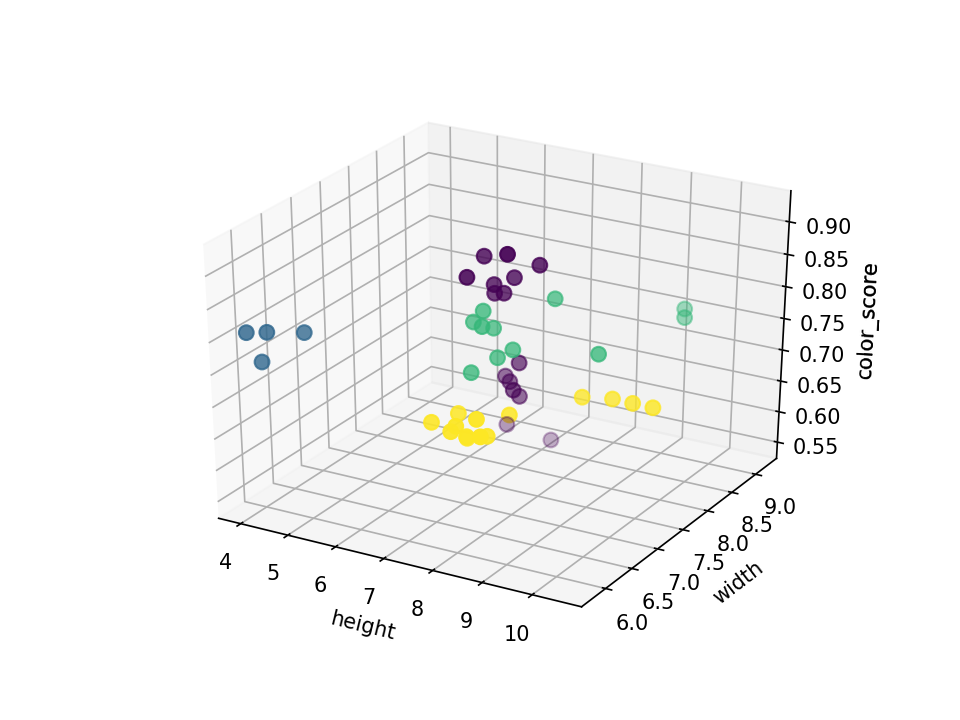

In [34]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X_train['height'],X_train['width'],X_train['color_score'],c=y_train,marker='o',s=50)
ax.set_xlabel('height') 
ax.set_ylabel('width') 
ax.set_zlabel('color_score')

plt.show()
#,'color_score'])

In [139]:
#X=fruits[['height','width','mass']] #,'color_score']]
X=fruits[['height','width','color_score']]
y=fruits['fruit_label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=50)

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
clf=KNeighborsClassifier(n_neighbors=3)
clf=SVC(kernel='rbf', C=10000, gamma=0.1) # C=0.025)

In [141]:
clf.fit(X_train,y_train)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [142]:
clf.score(X_test, y_test)

0.8

In [107]:
fruit_prediction=clf.predict([[20,4.3,5.5]])
lookup_fruits_name[fruit_prediction[0]]

'apple'

<IPython.core.display.Javascript object>


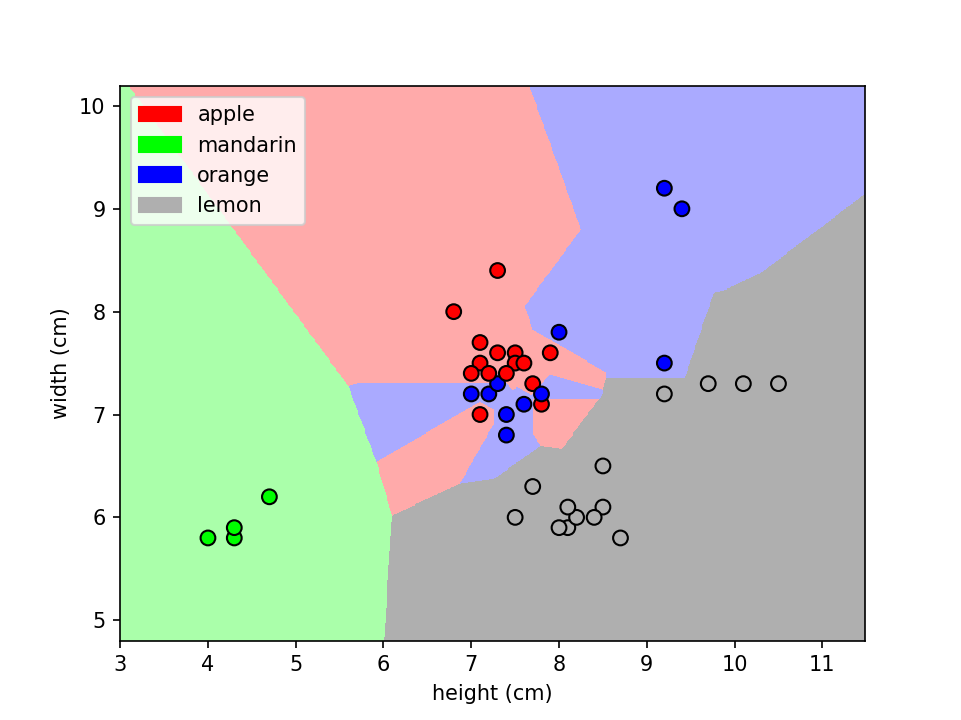

In [60]:
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(X_train,y_train,1,'uniform')
#scores.append(clf.score(X_test, y_test))

In [108]:
clf.score(X_test, y_test)

0.4583333333333333

<IPython.core.display.Javascript object>


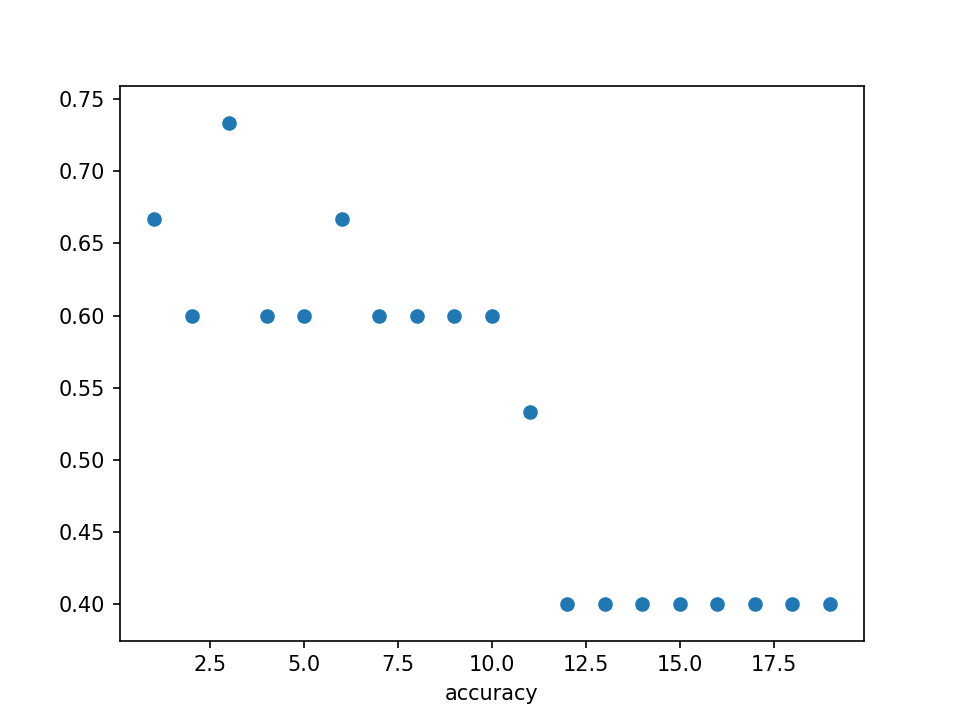

In [81]:
k_range=range(1,20)
scores=[]
for k in k_range:
    clf=KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test, y_test))
plt.figure()
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)

<IPython.core.display.Javascript object>


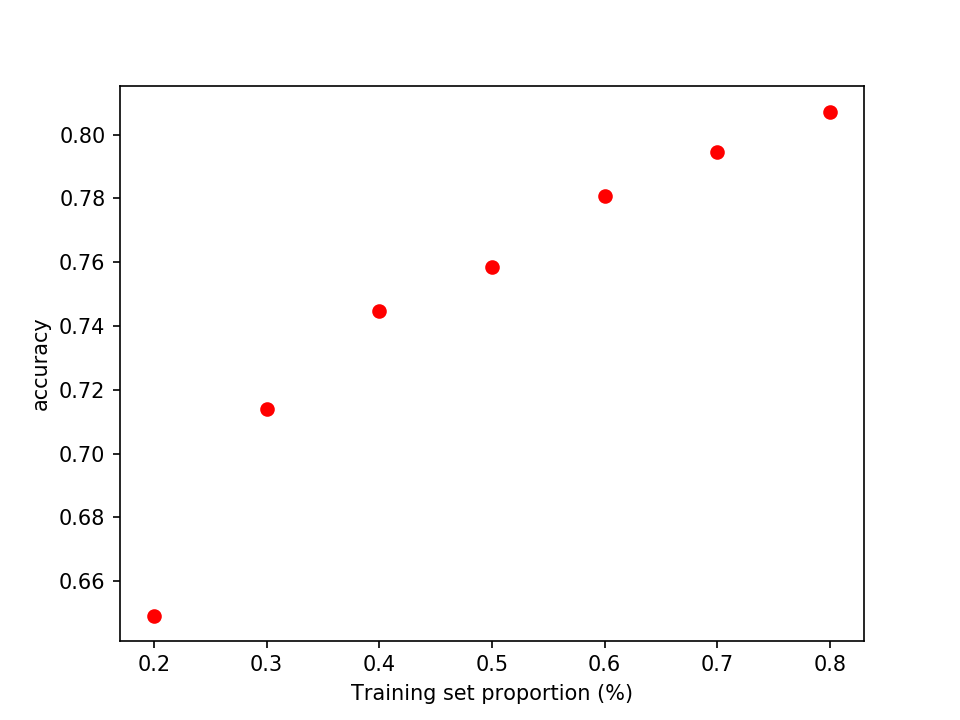

Text(0,0.5,'accuracy')

In [96]:
trn=[0.8,0.7,0.6,0.5,0.4,0.3,0.2]
clf=KNeighborsClassifier(n_neighbors=1)
plt.figure()
for t in trn:
    scores=[]
    for k in range(1,100):
        #clf=KNeighborsClassifier(n_neighbors=k)
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1-t) #, random_state=0)
        clf.fit(X_train,y_train)
        scores.append(clf.score(X_test, y_test))
    plt.plot(t,np.mean(scores),'ro')
    
plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy')    